In [1]:
#create a GUI application to track the COVID-19 cases.

#We need to use three different libraries here.

#tkinter – for GUI
#matplotlib – to show data graphically
#covid – to get COVID data
#inspired by COPYASSIGNMENT.com

In [2]:
!pip install matplotlib

In [ ]:
!python >= 3.6

In [1]:
!pip install covid

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for covid: filename=covid-2.3.0-py3-none-any.whl size=8448 sha256=3dddd5f1f826bb4bc9f4565bfd430568e76c381baf82a907c6c6234a6c37d020
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\44\55\06\71774e87b144b5d74f7e5e21bf8ba47c9e2431993287fdca61
Successfully built covid


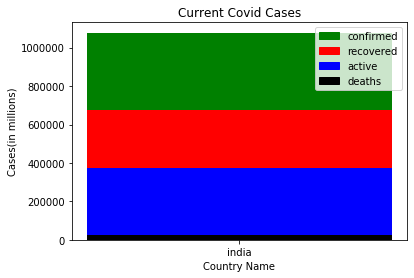

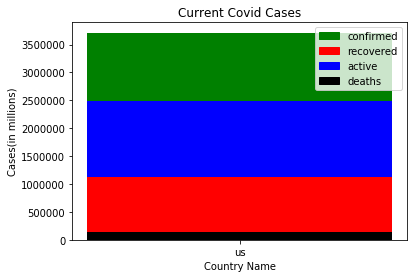

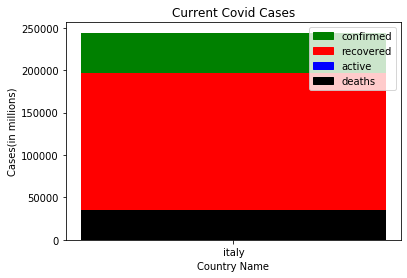

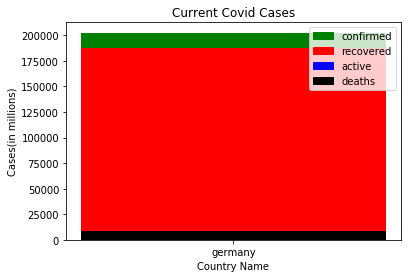

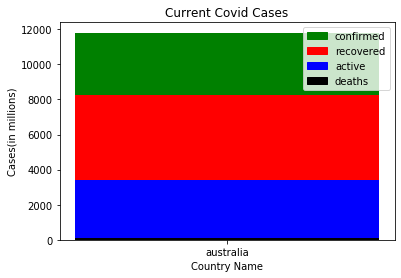

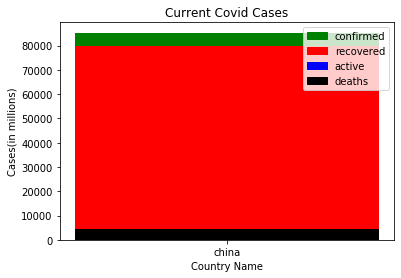

In [3]:
# importing tkinter
from tkinter import *
# initializing tkinter
root = Tk()
# setting geometry
root.geometry("350x350")
# setting title
root.title("Get Covid-19 Data Country Wise")

# function which will get covid data and will show it
def showdata():
    # importing matplotlib which will be used to show data graphically
    from matplotlib import pyplot as plt
    # to scale the data we are importing patches
    import matplotlib.patches as mpatches
    # importing covid library
    from covid import Covid
    # initializing covid library
    covid = Covid()
    # declaring empty lists to store different data sets
    cases = []
    confirmed = []
    active = []
    deaths = []
    recovered = []
    # using try and except to run program without errors
    try:
        # updating root
        root.update()
        # getting countries names entered by the user
        countries = data.get()
        # removing white spaces from the start and end of the string
        country_names = countries.strip()
        # replacing white spaces with commas inside the string
        country_names = country_names.replace(" ", ",")
        # splitting the string to store names of countries
        # as a list 
        country_names = country_names.split(",")
        # for loop to get all countries data
        for x in country_names:
            # appending countries data one-by-one in cases list 
            # here, the data will be stored as a dictionary
            # for one country i.e. for each country
            # there will be one dictionary in the list
            # which will contain the whole information
            # of that country
            cases.append(covid.get_status_by_country_name(x))
            # updating the root
            root.update()
        # for loop to get one country data stored as dict in list cases
        for y in cases:
            # storing every Country's confirmed cases in the confirmed list
            confirmed.append(y["confirmed"])
            # storing every Country's active cases in the active list
            active.append(y["active"])
            # storing every Country's deaths cases in the deaths list
            deaths.append(y["deaths"])
            # storing every Country's recovered cases in the recovered list
            recovered.append(y["recovered"])
        # marking the color information on scaleusing patches
        confirmed_patch = mpatches.Patch(color='green', label='confirmed')
        recovered_patch = mpatches.Patch(color='red', label='recovered')
        active_patch = mpatches.Patch(color='blue', label='active')
        deaths_patch = mpatches.Patch(color='black', label='deaths')
        # plotting the scale on graph using legend()
        plt.legend(handles=[confirmed_patch, recovered_patch, active_patch, deaths_patch])
        # showing the data using graphs
        # this whole for loop section is related to matplotlib
        for x in range(len(country_names)):
            plt.bar(country_names[x], confirmed[x], color='green')
            if recovered[x] > active[x]:
                plt.bar(country_names[x], recovered[x], color='red')
                plt.bar(country_names[x], active[x], color='blue')
            else:
                plt.bar(country_names[x], active[x], color='blue')
                plt.bar(country_names[x], recovered[x], color='red')
            plt.bar(country_names[x], deaths[x], color='black')
        # setting the title of the graph
        plt.title('Current Covid Cases')
        # giving label to x direction of graph
        plt.xlabel('Country Name')
        # giving label to y direction of graph
        plt.ylabel('Cases(in millions)')
        # showing the full graph
        plt.show()
    except Exception as e:
        # asking user to enter correct details
        # during entering the country names on GUI
        # please differentiate the country names
        # with spaces or comma but not with both
        # otherwise you will come to this section
        data.set("Enter correct details again")


Label(root, text="Enter all countries names\nfor whom you want to get\ncovid-19 data", font="Consolas 15 bold").pack()
Label(root, text="Enter country name:").pack()
data = StringVar()
data.set("Seperate country names using comma or space(not both)")
entry = Entry(root, textvariable=data, width=50).pack()
Button(root, text="Get Data", command=showdata).pack()
root.mainloop()